The reading of concrete.csv file, the associated code for plotting histogram, and printing the information related to each variable are represented in the follwing cell. As it appears, in addition to the number of rows for each attribute, the central values including mean, standard deviation, minimum, maximum, first quarter, second quarter, and third quarter are shown for all the attributes.</br>
The distributions for attributes can be inferred from the histograms, although it is not a precise interpretation as there might be some deviations from the excact shape of original distributions among the histograms. The Age attributes seems to has the exponential distribution as the biggest value is at 0 and the tail dramatically decreases to almost zero. Without considering the exact shape of the distribution of each characteristic, they can be thought of as being normally distributed.:</br></br>

            Cement  BlastFurnaceSlag       FlyAsh        Water  \
count  1030.000000       1030.000000  1030.000000  1030.000000   
mean    281.167864         73.895825    54.188350   181.567282   
std     104.506364         86.279342    63.997004    21.354219   
min     102.000000          0.000000     0.000000   121.800000   
25%     192.375000          0.000000     0.000000   164.900000   
50%     272.900000         22.000000     0.000000   185.000000   
75%     350.000000        142.950000   118.300000   192.000000   
max     540.000000        359.400000   200.100000   247.000000   

       Superplasticizer  CoarseAggregate  FineAggregate          Age  \
count       1030.000000      1030.000000    1030.000000  1030.000000   
mean           6.204660       972.918932     773.580485    45.662136   
std            5.973841        77.753954      80.175980    63.169912   
min            0.000000       801.000000     594.000000     1.000000   
25%            0.000000       932.000000     

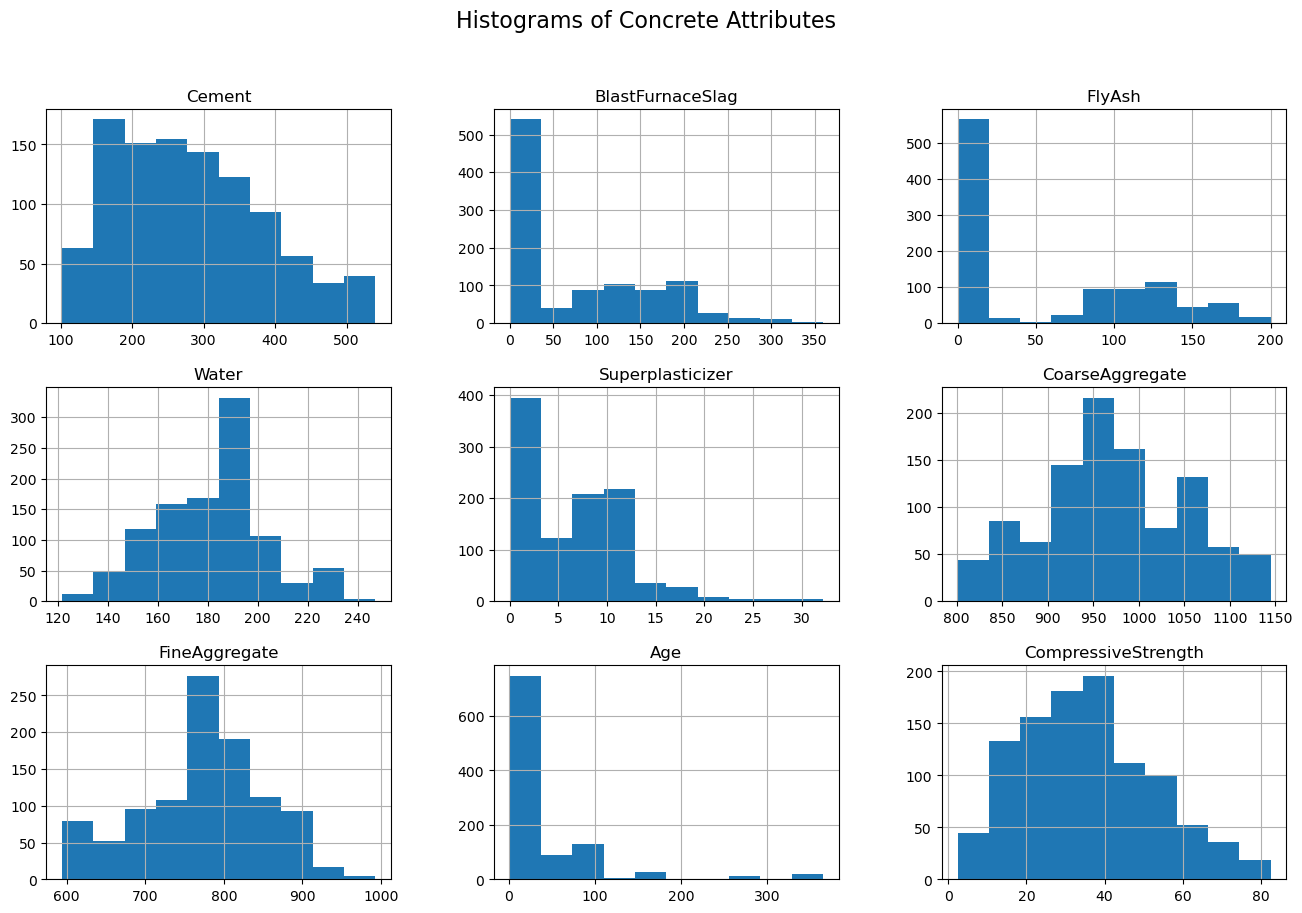

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the concrete.csv dataset
df = pd.read_csv('concrete.csv')

# Display basic statistics of the dataset
print(df.describe())

# Create histograms for each attribute
df.hist(figsize=(16, 10))
plt.suptitle("Histograms of Concrete Attributes", fontsize=16)
plt.show()

Except Cement, BlastFurnucaSlag, and CoarseAggregate, the rest of the attributes have outliers. The outliers are shown above and below the upper and lower whiskers, respectively, in form of almond-shape dots.

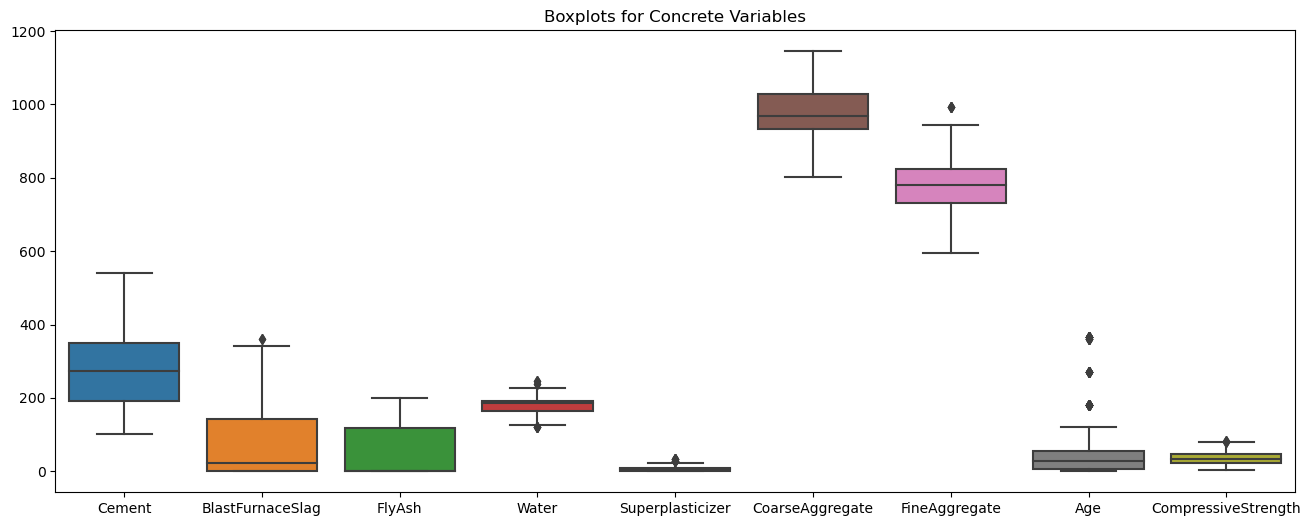

In [6]:
import seaborn as sns


# Boxplots for potential outliers
plt.figure(figsize=(16, 6))
sns.boxplot(data=df)
plt.title("Boxplots for Concrete Variables")
plt.show()

The following cell contains the provided code for generating a pair plot. The parameter 'diag_kind='kde'' specifies that kernel density estimates should be displayed on the diagonal axes, providing a line-based representation of histograms as seen previously. The target attribute, as per the question, is Strength (or CompressiveStrength). Below are the explanations of the relationships between Strength and the other attributes:

1. Cement & CompressiveStrength: Demonstrates a strong positive relationship.
2. BlastFurnaceSlag & CompressiveStrength: Exhibits a weak negative relationship.
3. Water & CompressiveStrength: No clear trend is observed, indicating neither a negative nor positive relationship.
4. Age & CompressiveStrength: No clear trend is observed, indicating neither a negative nor positive relationship.
5. FlyAsh & CompressiveStrength: Shows a weak negative relationship.
6. Superplasticizer & CompressiveStrength: Indicates a weak positive relationship.
7. CoarseAggregate & CompressiveStrength: Shows a weak negative relationship.
8. FineAggregate & CompressiveStrength: Shows a weak negative relationship.

These observations are based on visual inspection and should be considered as rough interpretations, as they may not be as accurate as statistical analysis.

In [ ]:
# Pair plot for pairwise relationships
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairwise Relationships between Independent Variables", y=1.02)
plt.show()

The following cell contains the code for correlation assessment. The `corr(method='pearson')` method from the Pandas library is utilized to compute the correlation between columns in the DataFrame using the Pearson method. Subsequently, `sns.heatmap()` from the Seaborn library is employed to generate the heatmap. In the resulting heatmap, a red color (1.0) signifies a strong positive linear relationship between two attributes, while a blue color (close to -0.6) indicates a strong negative correlation. Values closer to zero suggest that there is no linear trend between the two attributes.

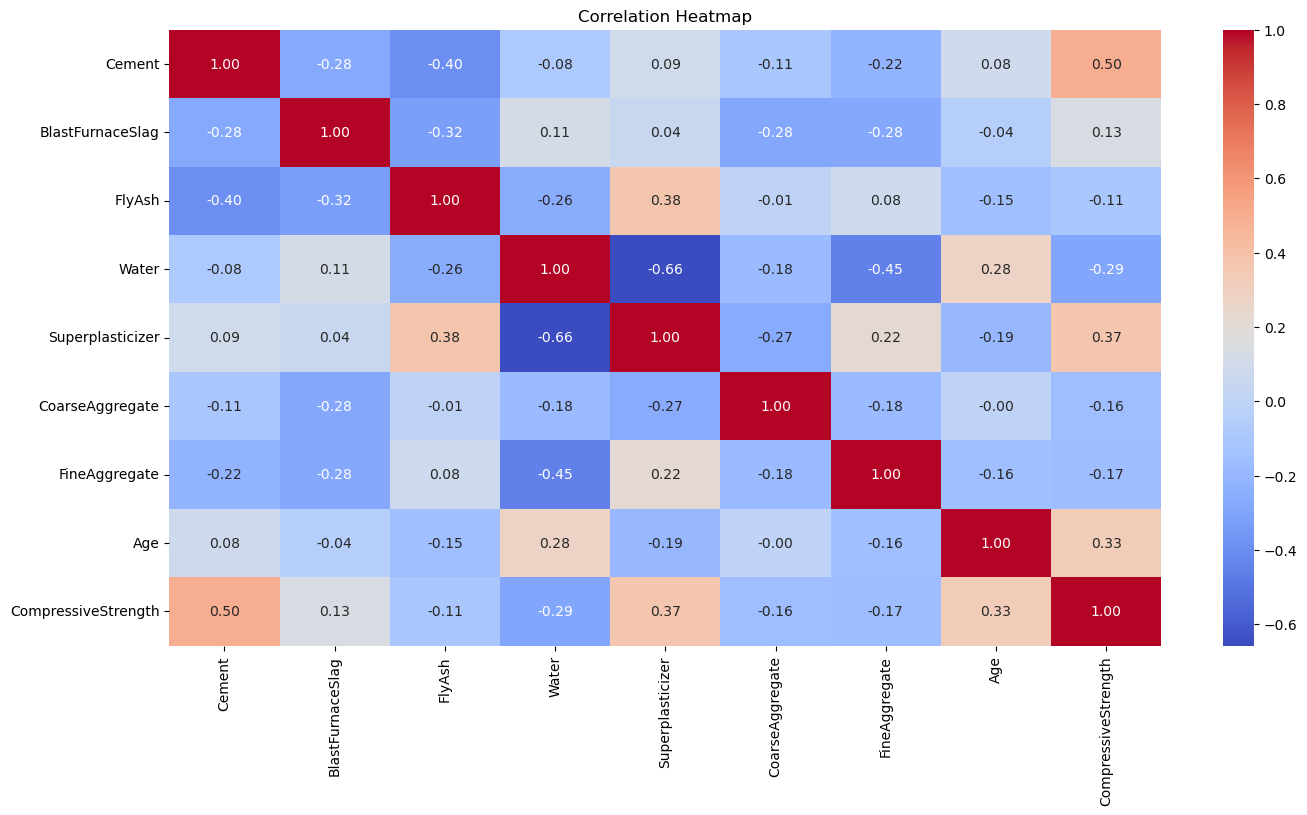

In [8]:
# Heatmap for correlation
plt.figure(figsize=(16, 8))
corr_matrix = df.corr(method ='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<p style="text-align: left; font-weight:bold; color: yellow; font-size: 18px">Data Preparation & Feature Engineering <br/>

Upon executing the provided code, duplicate rows in the DataFrame are removed, resulting in a unique DataFrame. Upon examination, it's noted that the initial DataFrame contained 1030 rows, while the DataFrame after dropping duplicates consists of 1005 rows. This indicates the presence of 25 duplicated rows in the DataFrame.

In [9]:
# understanding the structure of the DataFrame, checking for missing values, and identifying the data types of columns.
df.info()

# Remove duplicated rows, keeping only the first occurrence of each group of the duplicated rows
df = df.drop_duplicates(keep='first')
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


Based on the outcome of the previous cell, it is observed under the "Non-Null" column that there are no null values in any attribute. This observation is confirmed by executing the following code cell. The `df.dropna()` function is then executed to ensure the removal of any missing values from the DataFrame.
<span style="font-weight: bold; color: green"> It's important to note that in subsequent sections, the value '0' will be interpreted as missing and will be replaced with appropriate values such as "mean" or "median" depending on the distribution type of each attribute.</span>

In [10]:
# Count missing values in DataFrame
pd.isnull(df).sum()

Cement                 0
BlastFurnaceSlag       0
FlyAsh                 0
Water                  0
Superplasticizer       0
CoarseAggregate        0
FineAggregate          0
Age                    0
CompressiveStrength    0
dtype: int64

In [11]:
# Handle missing values (if any)
df.dropna()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


Based on assumptions about the distribution types of attributes made in the histogram section, "Age" was considered to follow a non-normal distribution, while others were assumed to follow normal distributions. For normally distributed attributes, the standard deviation method was applied to identify outliers, defining outliers as data points that are three times the standard deviation away from the mean value. Conversely, for attributes assumed to follow non-normal distributions, the percentile method was used, defining outliers as data points falling below the 1st percentile or above the 99th percentile of the dataset.

In the following code cell, both methods are applied to remove outliers from the DataFrame based on the distribution type of each attribute.

For some attributes, certain outliers persist due to assumptions made about their distributions in the histogram section. This trade-off between retaining more data and allowing for fewer outliers simplifies the process and prevents data loss. The modeling section demonstrates reasonable R2 accuracy under these circumstances. However, aiming for exact distributions of attributes would result in substantial data loss (almost 80% of rows), and the R2 accuracy indices would not be reasonable (around 0.45 for each regressor).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dividing normally distributed attributes from not normally distributed ones
norm_columns = ['CompressiveStrength', 'CoarseAggregate', 'Cement', 'Water', 'Superplasticizer', 'FineAggregate', 'BlastFurnaceSlag', 'FlyAsh']
not_norm_columns = ['Age']

# Remove outliers using a for loop
# Remove outliers for normally distributed attributes
for column in norm_columns:
    upper_limit = df[column].mean() + 3 * df[column].std()
    lower_limit = df[column].mean() - 3 * df[column].std()
    df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]

# Remove outliers for non-normally distributed attributes
for column in not_norm_columns:
    upper_limit = df[column].quantile(.99)
    lower_limit = df[column].quantile(.01)
    df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]

# Create boxplots
plt.figure(figsize=(16, 6))
sns.boxplot(data=df)
plt.title("Boxplots for Concrete Variables")
plt.show()



Some values deviate from the range [-1, 1] due to the standard scaling, which is typically suitable for normally distributed values. However, since most of the attribute values in this dataset are not normally distributed, this scaling method may not be ideal for all attributes.

In [13]:
# Import StandardScaler(or z-score normalization)
from sklearn.preprocessing import StandardScaler

# Create a copy of the original DataFrame
df_scaled = df.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Iterate over each column in the DataFrame
for column in df_scaled.columns:
    scaler.fit(df_scaled[column].values.reshape(-1,1)) 
    df_scaled[column]=scaler.transform(df_scaled[column].values.reshape(-1,1))

df_scaled

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,2.579944,-0.851883,-0.878280,-0.993254,-0.628989,0.820532,-1.194704,-0.364370,2.733703
1,2.579944,-0.851883,-0.878280,-0.993254,-0.628989,1.011221,-1.194704,-0.364370,1.568049
2,0.558495,0.822199,-0.878280,2.208046,-1.091546,-0.552433,-2.230991,4.181802,0.175704
4,-0.745948,0.703545,-0.878280,0.461882,-1.091546,0.037433,0.694624,5.872527,0.435239
5,-0.089342,0.487383,-0.878280,2.208046,-1.091546,-0.552433,-1.270530,0.800352,0.611053
...,...,...,...,...,...,...,...,...,...
1025,0.011974,0.510879,0.519201,-0.139574,0.555155,-1.339345,-0.028249,-0.364370,0.433951
1026,0.458154,-0.851883,0.910743,0.655901,0.832689,-2.002945,0.541708,-0.364370,-0.409699
1027,-1.234018,0.785781,0.802411,0.495836,0.037092,-1.055854,0.119611,-0.364370,-0.891417
1028,-1.130754,1.341458,-0.878280,-0.333592,0.999209,0.179815,0.232086,-0.364370,-0.307302


In this section, '0' values are treated as null values. For attributes assumed to follow non-normal distributions, missing values are imputed with the median value, while for normally distributed attributes, they are imputed with the mean value. The code implementing this procedure is provided in the following cell.

In [14]:
import numpy as np

# Convert '0' values to NaN (missing values)
df_scaled.replace(0, np.nan, inplace=True)

# Define normally distributed columns and non-normally distributed columns
norm_columns = ['CompressiveStrength', 'CoarseAggregate', 'Cement', 'Water', 'Superplasticizer', 'FineAggregate', 'BlastFurnaceSlag', 'FlyAsh']
not_norm_columns = ['Age']

# columns = ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer', 'FineAggregate', 'Age', 'CompressiveStrength', 'CoarseAggregate']
# Fill missing values for normally distributed columns with mean
for column in norm_columns:
    mean_value = df_scaled[column].mean()
    df_scaled[column].fillna(mean_value, inplace=True)

# # Fill missing values for non-normally distributed columns with median
for column in not_norm_columns:
    median_value = df_scaled[column].median()
    df_scaled[column].fillna(median_value, inplace=True)

df_scaled

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,2.579944,-0.851883,-0.878280,-0.993254,-0.628989,0.820532,-1.194704,-0.364370,2.733703
1,2.579944,-0.851883,-0.878280,-0.993254,-0.628989,1.011221,-1.194704,-0.364370,1.568049
2,0.558495,0.822199,-0.878280,2.208046,-1.091546,-0.552433,-2.230991,4.181802,0.175704
4,-0.745948,0.703545,-0.878280,0.461882,-1.091546,0.037433,0.694624,5.872527,0.435239
5,-0.089342,0.487383,-0.878280,2.208046,-1.091546,-0.552433,-1.270530,0.800352,0.611053
...,...,...,...,...,...,...,...,...,...
1025,0.011974,0.510879,0.519201,-0.139574,0.555155,-1.339345,-0.028249,-0.364370,0.433951
1026,0.458154,-0.851883,0.910743,0.655901,0.832689,-2.002945,0.541708,-0.364370,-0.409699
1027,-1.234018,0.785781,0.802411,0.495836,0.037092,-1.055854,0.119611,-0.364370,-0.891417
1028,-1.130754,1.341458,-0.878280,-0.333592,0.999209,0.179815,0.232086,-0.364370,-0.307302


The following cell contains the code to detect the relationship among all attributes. A threshold of 0.4 is considered for high correlation, based on the correlations between "CompressiveStrength" (the target attribute) and the independent attributes. This threshold is chosen because most of the absolute correlation values between the target and independent attributes are below 0.4. Positive and negative signs of correlation coefficients indicate positive and negative relationships, respectively. Among the independent attributes and the target (CompressiveStrength), the highest absolute correlation value is for "Cement" (0.5238), while the lowest is for "FlyAsh" (-0.0713).

In [15]:
# Calculate the correlation matrix
correlation_matrix = df_scaled.corr(method="pearson")

# Display the correlation matrix
print(correlation_matrix)

# Check for high correlation (multicollinearity)
threshold = 0.4  # Define the threshold for high correlation (e.g., 0.4)
high_correlation_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Display pairs of variables with high correlation
if high_correlation_pairs:
    print("\nPairs of variables with high correlation (above threshold):")
    for pair in high_correlation_pairs:
        print(pair)
else:
    print("\nNo pairs of variables have high correlation above the threshold.")

                       Cement  BlastFurnaceSlag    FlyAsh     Water  \
Cement               1.000000         -0.319063 -0.391033 -0.023342   
BlastFurnaceSlag    -0.319063          1.000000 -0.293780  0.128407   
FlyAsh              -0.391033         -0.293780  1.000000 -0.279336   
Water               -0.023342          0.128407 -0.279336  1.000000   
Superplasticizer    -0.053073          0.049241  0.500693 -0.608957   
CoarseAggregate     -0.033599         -0.290303 -0.089184 -0.246022   
FineAggregate       -0.269679         -0.275094  0.088373 -0.431942   
Age                  0.093088         -0.063037 -0.136122  0.206681   
CompressiveStrength  0.523800          0.108153 -0.071384 -0.331563   

                     Superplasticizer  CoarseAggregate  FineAggregate  \
Cement                      -0.053073        -0.033599      -0.269679   
BlastFurnaceSlag             0.049241        -0.290303      -0.275094   
FlyAsh                       0.500693        -0.089184       0.088373 

In the previous section, it was observed that the attribute "FlyAsh" exhibits the weakest correlation with the target attribute. Therefore, in order to apply a Filter Method for Feature Selection in Dimensionality Reduction Techniques, the "FlyAsh" attribute has been filtered out based on the provided code in the following cell. This reduction in dimensionality is expected to lead to faster and less complex machine learning processes.

In [16]:
# Use Filter to select the specified column
filtered_column = df_scaled.filter(['FlyAsh'])

# Show the rest of the columns by dropping the filtered column
df_filtered = df_scaled.drop(columns=['FlyAsh'])

df_filtered

,Cement,BlastFurnaceSlag,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,2.579944,-0.851883,-0.993254,-0.628989,0.820532,-1.194704,-0.364370,2.733703
1,2.579944,-0.851883,-0.993254,-0.628989,1.011221,-1.194704,-0.364370,1.568049
2,0.558495,0.822199,2.208046,-1.091546,-0.552433,-2.230991,4.181802,0.175704
4,-0.745948,0.703545,0.461882,-1.091546,0.037433,0.694624,5.872527,0.435239
5,-0.089342,0.487383,2.208046,-1.091546,-0.552433,-1.270530,0.800352,0.611053
...,...,...,...,...,...,...,...,...
1025,0.011974,0.510879,-0.139574,0.555155,-1.339345,-0.028249,-0.364370,0.433951
1026,0.458154,-0.851883,0.655901,0.832689,-2.002945,0.541708,-0.364370,-0.409699
1027,-1.234018,0.785781,0.495836,0.037092,-1.055854,0.119611,-0.364370,-0.891417
1028,-1.130754,1.341458,-0.333592,0.999209,0.179815,0.232086,-0.364370,-0.307302


Now that the data is prepared and preprocessed, it's prudent to save it into a new CSV file for ease of access in future analysis steps. This will streamline the process and enhance the scalability of the project. If someone else intends to work solely on the subsequent steps, they will have direct access to the preprocessed data without needing to rerun the previous cells.

In [17]:
df_filtered.to_csv('concrete_filtered.csv', index=False)

<p style="text-align: left; font-weight:bold; color: yellow; font-size: 18px">Modeling & Evaluation <br/>

In [19]:
df = pd.read_csv("concrete_filtered.csv")

The data is split into two categories: train and test. The train set comprises 70% of the initial data, while the test set constitutes the remaining 30%. The target variable in this analysis is the CompressiveStrength column, as the aim of the work is to predict the strength of concrete.

In [20]:
from sklearn.model_selection import train_test_split

# definign the target variable
y = df['CompressiveStrength']
x = df.drop(['CompressiveStrength'], axis=1)

X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=0)

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

To utilize the K-Nearest Neighbor Regressor algorithm, the sklearn library, which already has the necessary functionality deployed, will be leveraged. The hyperparameters will be tuned to optimize the algorithm's performance. The ranges for the following parameters will be set:

- **n_neighbors**: This hyperparameter, determining the number of neighbors used in the prediction, will be specified as a list ranging from 2 to 25.

- **weights**: The weight function used in prediction, which could be 'uniform' (where all points in each neighborhood are weighted equally) or 'distance' (where points are weighted by the inverse of their distance), will be specified.

- **metric**: This parameter, in KNN regression, determines the distance measure used to compute similarity between data points. Options like euclidean calculate the straight-line distance, manhattan computes the sum of absolute differences, and minkowski generalizes both with the p parameter (where p=1 represents manhattan and p=2 represents euclidean). The appropriate metric will be chosen depending on the data's characteristics and the problem at hand.

- **p**: This hyperparameter, only used when metric = minkowski, defines the power parameter for the Minkowski distance metric.

It's a best practice to use cross-validation to ensure the results are reliable. A repeated k-fold cross-validation strategy with 10 folds and 3 repeats using RepeatedKFold will be defined. This will split the data into training and validation sets multiple times to robustly assess the model's performance.

Finally, a GridSearchCV object will be initialized with the parameter grid (param_grid), the estimator (knn_reg), and the cross-validation strategy (cv). This sets up the grid search to explore different combinations of hyperparameters and select the best combination based on cross-validated performance. By setting n_jobs=-1, the algorithm will be enabled to utilize every processor in the system, which can significantly speed up the search process. It's worth noting that enabling parallel processing reduced the time taken for the grid search from 40 seconds to just 11 seconds compared to using a single processor.

In [28]:
knn_reg = KNeighborsRegressor()
n_neighbors = list(range(2,25))
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
p=[1,2]

param_grid = {
    'n_neighbors': n_neighbors,
    'weights': weights,
    'metric': metric,
    'p': p
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(param_grid=param_grid, estimator=knn_reg, cv=cv, n_jobs=-1)

knn_reg_best_model = grid_search.fit(X_train,y_train)

In [29]:
knn_reg_best_model.best_estimator_

KNeighborsRegressor(metric='manhattan', p=1, weights='distance')

The Random Forest Regressor algorithm will undergo the same process, as the hyperparameters need to be tuned to determine the optimal approach. The cross-validation procedure remains unchanged from the previous section, and the only difference lies in the param_grids, which are as follows:

- **n_estimators**: This parameter determines the number of trees in the random forest ensemble. Different values such as 50, 100, and 150 are tested to strike a balance between model complexity and performance.

- **max_depth**: The maximum depth allowed for each decision tree in the forest is set by this parameter. Testing values like None (unlimited depth), 5, 10, and 15 allows exploration of different levels of tree complexity.

- **min_samples_split**: This parameter defines the minimum number of samples required to split an internal node during the tree-building process. Testing values like 2, 5, and 10 helps find the optimal balance between model complexity and generalization.

- **min_samples_leaf**: Specifies the minimum number of samples required to be at a leaf node. Testing values like 1, 2, and 4 explores different trade-offs between model complexity and generalization, as higher values can prevent overfitting while lower values may lead to more detailed trees and increased risk of overfitting.

In [30]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)


rf_reg = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=cv, n_jobs=-1)

rf_reg_best_model = grid_search.fit(X_train,y_train)

In [31]:
rf_reg_best_model.estimator

RandomForestRegressor(random_state=0)

In [32]:
xgb_reg = xgb.XGBRegressor()
xgb_reg = xgb_reg.fit(X_train,y_train)

In this code, the predictions from multiple individual regression models are combined by the VotingRegressor to make a final prediction. Once fitted, the VotingRegressor can be utilized for making predictions on new data. The individual base models' predictions are combined using the specified voting strategy, resulting in the final prediction. This ensemble approach typically yields more robust and accurate predictions compared to using a single base model alone, as it capitalizes on the strengths of multiple models while addressing their individual weaknesses.

In [34]:
voting_reg = VotingRegressor(estimators=[("KNN Regressor", knn_reg_best_model),
                                         ("RandomForest Regressor" , rf_reg_best_model),
                                         ("XGBoost", xgb_reg)],
                             n_jobs=-1)

voting_reg.fit(X_train,y_train)


VotingRegressor(estimators=[('KNN Regressor',
                             GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
                                          estimator=KNeighborsRegressor(),
                                          n_jobs=-1,
                                          param_grid={'metric': ['euclidean',
                                                                 'manhattan',
                                                                 'minkowski'],
                                                      'n_neighbors': [2, 3, 4,
                                                                      5, 6, 7,
                                                                      8, 9, 10,
                                                                      11, 12,
                                                                      13, 14,
                                                                      15, 16,
                                                                      17, 18,
                                                                      19, 20,
                                                                      21, 22,
                                                                      23, 24],
                                                      'p': [1, 2],
                                                      'weights': ['uniform',
                                                                  'distance']})),
                            ('RandomFore...
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...))],
                n_jobs=-1)

To utilize the mentioned evaluation metrics, sklearn can be used once again. It is more convenient to write a method for applying all four metrics to all models. The metrics evaluate the following:

- **Mean Squared Error (MSE):** MSE measures the average squared difference between the actual and predicted values. It penalizes larger errors more heavily than smaller ones and is commonly used to evaluate the overall model performance.

- **Root Mean Squared Error (RMSE):** RMSE is the square root of MSE and represents the standard deviation of the residuals. It provides a measure of the average magnitude of errors in the predicted values, in the same units as the target variable.

- **Mean Absolute Error (MAE):** MAE measures the average absolute difference between the actual and predicted values. It provides a more interpretable measure of model accuracy compared to MSE, as it is not influenced by large errors to the same extent.

- **Coefficient of Determination (R²):** R² quantifies the proportion of the variance in the target variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates perfect prediction and 0 indicates that the model does not explain any variability in the target variable beyond what is expected by chance.

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
   
def performance(model):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2_acc = r2_score(y_test, y_pred)
    return mse, rmse, mae, r2_acc

The lowest MSE, RMSE, and MAE, as well as the highest R² accuracy, are achieved by XGBoost, indicating superior predictive performance and a better ability to explain the variance in the target variable compared to other models. Random Forest Regressor closely follows XGBoost in terms of performance, with slightly higher MSE, RMSE, and MAE, and a slightly lower R² accuracy. Among the evaluated models, K-Nearest Neighbor Regressor exhibits the highest MSE, RMSE, and MAE, and the lowest R² accuracy, indicating the poorest performance in terms of predictive accuracy and explaining the variability in the target variable.

The Voting Regressor performs slightly worse than the Random Forest Regressor, with higher MSE, RMSE, and MAE, but a slightly higher R² accuracy. Essentially, this suggests that while the Voting Regressor attempts to combine all the algorithms together and extract the best from each, it won't necessarily outperform all of them.

In [54]:
from tabulate import tabulate

models = [("K-Nearest Neighbor Regressor", knn_reg_best_model),
          ("Random Forest Regressor", rf_reg_best_model),
          ("XGBoost", xgb_reg),
          ("Voting Regressor", voting_reg)]

results = []
for model_name, model in models:
    mse, rmse, mae, r2_acc = performance(model)
    results.append([model_name, mse, rmse, mae, r2_acc])

headers = ["Model", "MSE", "RMSE", "MAE", "R2 Accuracy"]
print(tabulate(results, headers=headers, tablefmt="fancy_grid"))

╒══════════════════════════════╤══════════╤══════════╤══════════╤═══════════════╕
│ Model                        │      MSE │     RMSE │      MAE │   R2 Accuracy │
╞══════════════════════════════╪══════════╪══════════╪══════════╪═══════════════╡
│ K-Nearest Neighbor Regressor │ 0.240678 │ 0.49059  │ 0.333309 │      0.755134 │
├──────────────────────────────┼──────────┼──────────┼──────────┼───────────────┤
│ Random Forest Regressor      │ 0.140858 │ 0.37531  │ 0.252101 │      0.856692 │
├──────────────────────────────┼──────────┼──────────┼──────────┼───────────────┤
│ XGBoost                      │ 0.117126 │ 0.342237 │ 0.222182 │      0.880836 │
├──────────────────────────────┼──────────┼──────────┼──────────┼───────────────┤
│ Voting Regressor             │ 0.133889 │ 0.365909 │ 0.233078 │      0.863781 │
╘══════════════════════════════╧══════════╧══════════╧══════════╧═══════════════╛
